In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
display (os.getcwd())

'/content'

In [3]:
dt = pd.read_csv('Train.csv')
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print (dt.shape)


(8523, 12)


In [5]:
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [8]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
cat_col.remove('Item_Identifier')

In [12]:
cat_col.remove('Outlet_Identifier')
display (cat_col)


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
for col in cat_col:
    print(col , len(dt[col].unique()))


Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [14]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

In [15]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
display (dt['Item_Weight'].isnull().sum())

1463

In [17]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
Item_Weight_null['Item_Identifier'].value_counts()

FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: Item_Identifier, Length: 1142, dtype: int64

In [19]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [20]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [21]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])


In [22]:
result = dt['Item_Weight'].isnull().sum()
display (result)


0

In [23]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)


,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [24]:
result= dt['Outlet_Size'].isnull().sum()
display (result)


2410

In [25]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [26]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [27]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [28]:
display (dt['Outlet_Size'].isnull().sum())

2410

In [29]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [30]:
display (sum(dt['Item_Visibility']==0))

526

In [31]:
display (sum(dt['Item_Visibility']==0))

526

In [32]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creating New Attributes

In [33]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [34]:
display (dt['New_Item_Type'].value_counts())

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [35]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [36]:
display (dt['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [38]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [39]:
result =  (dt['Item_Fat_Content'].value_counts())
display (result)


Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [40]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [41]:
dt['Outlet_Years'] = 2022 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])


0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Years, Length: 8523, dtype: int64


In [42]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


Exploratory Data Analysis

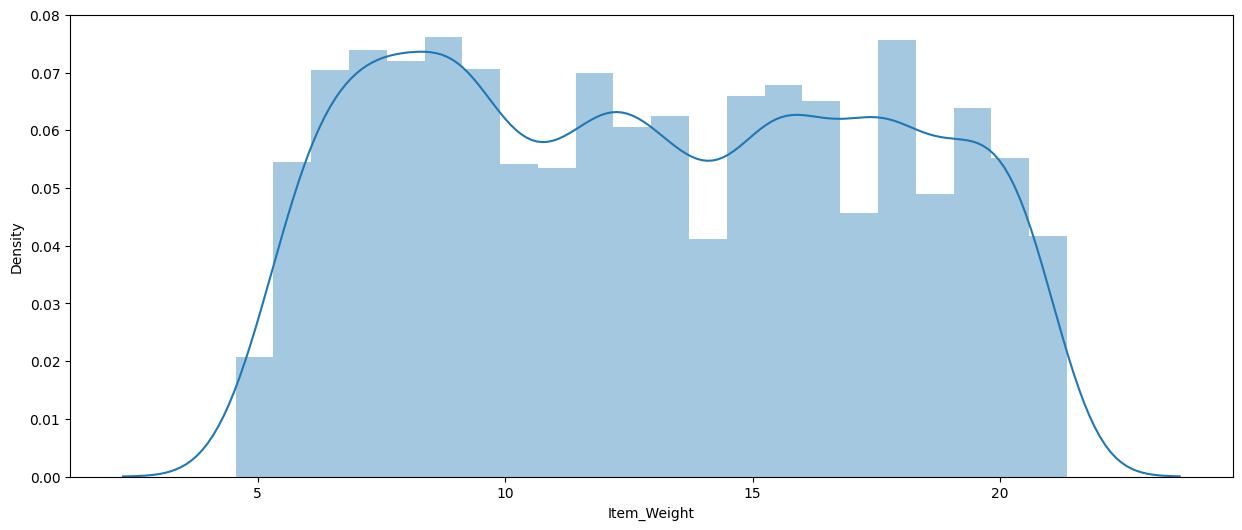

In [43]:
sns.distplot(dt['Item_Weight'])
plt.show()


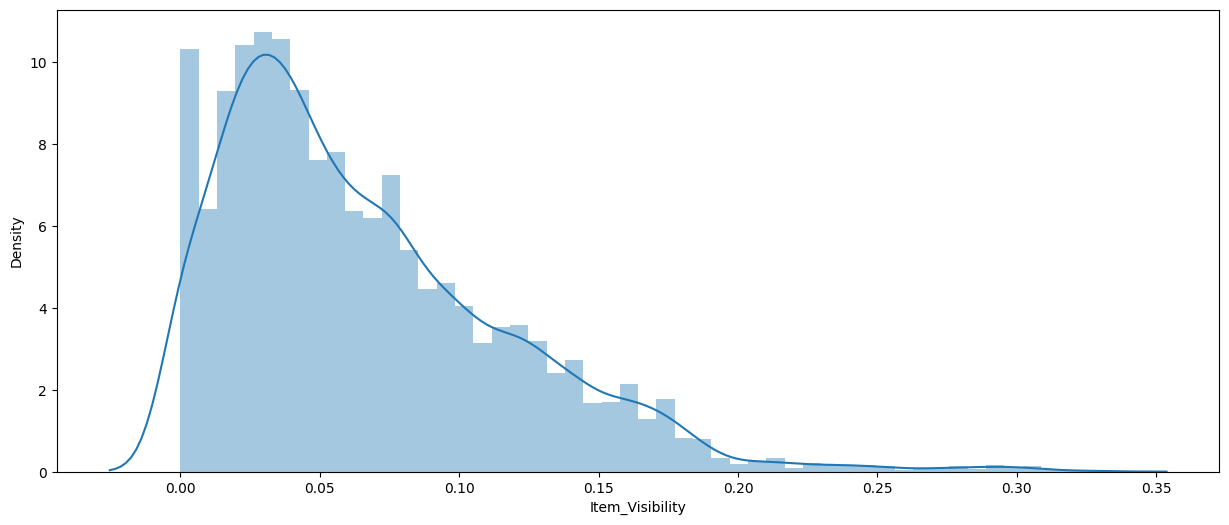

In [44]:
sns.distplot(dt['Item_Visibility'])
plt.show()


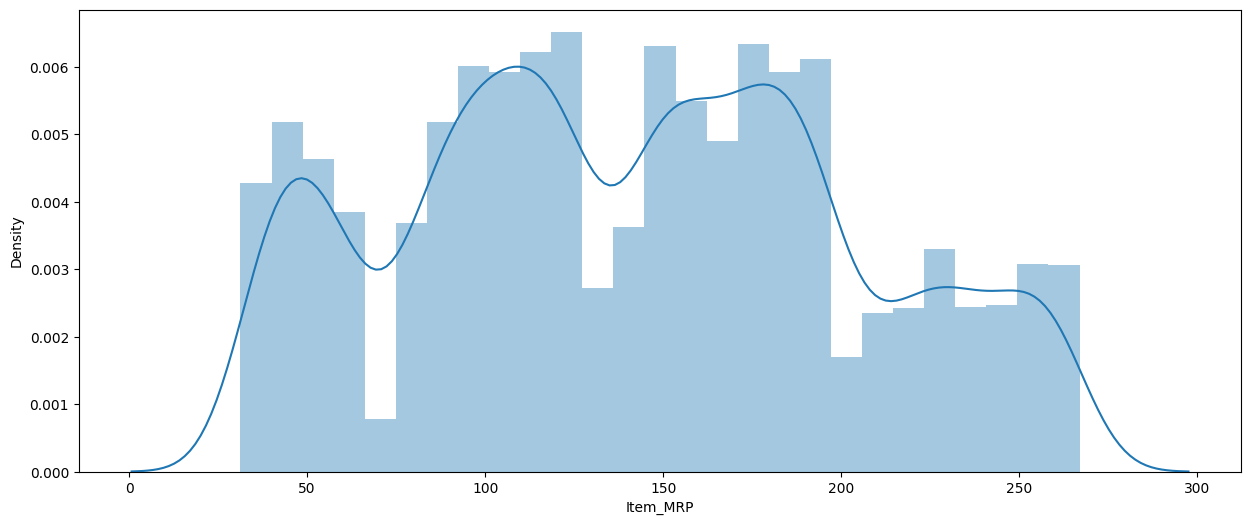

In [45]:
sns.distplot(dt['Item_MRP'])
plt.show()


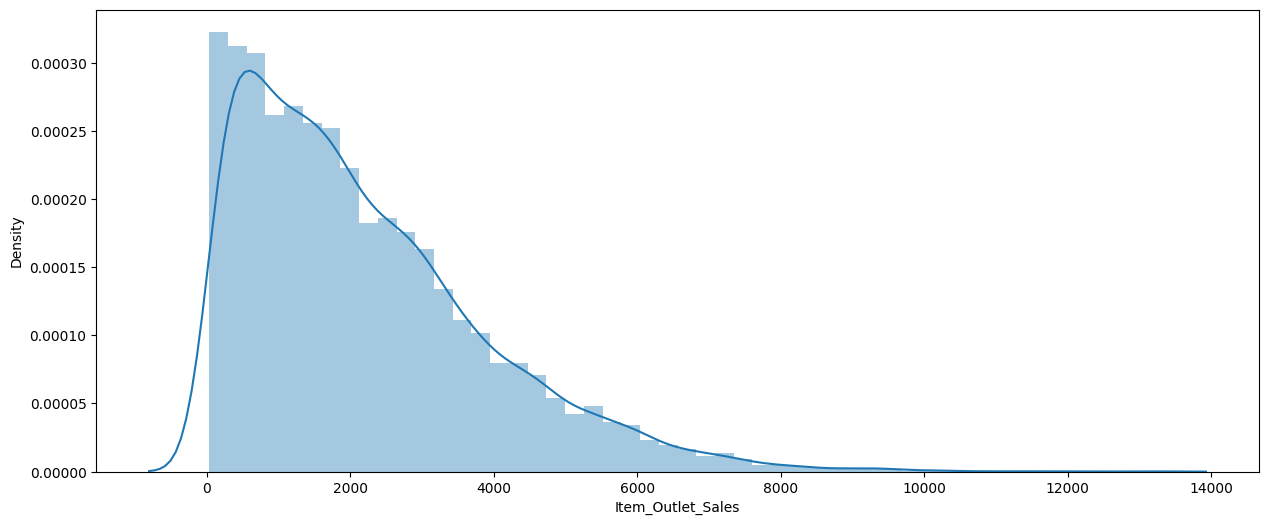

In [46]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


In [47]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])



0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

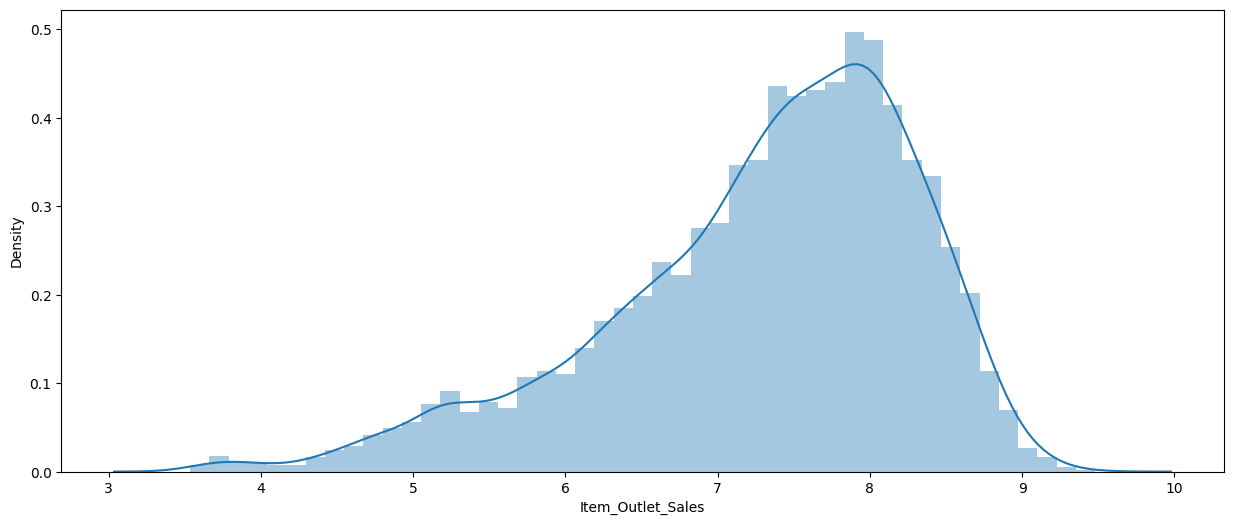

In [48]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()


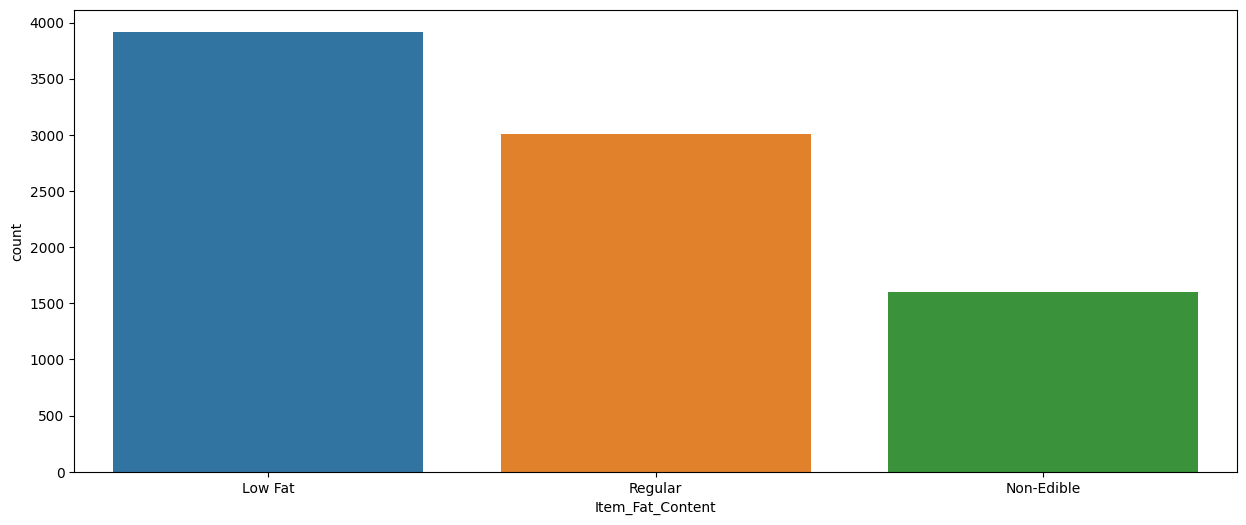

In [49]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()


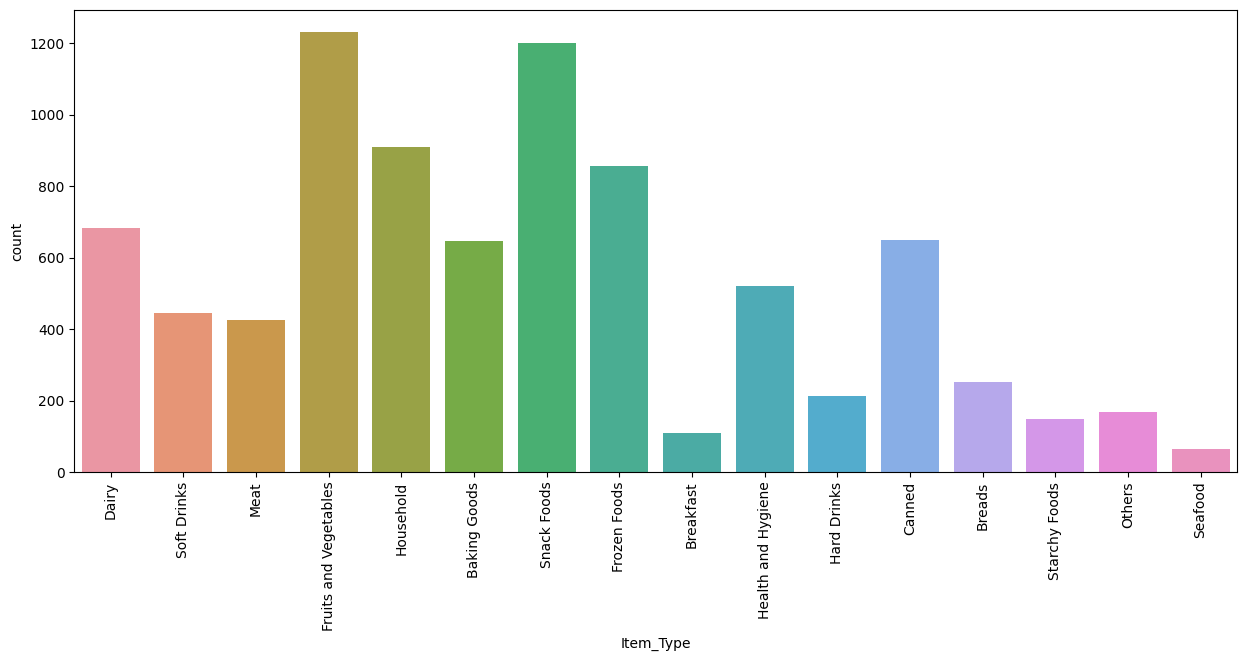

In [50]:
l = list(dt['Item_Type'].unique())
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()


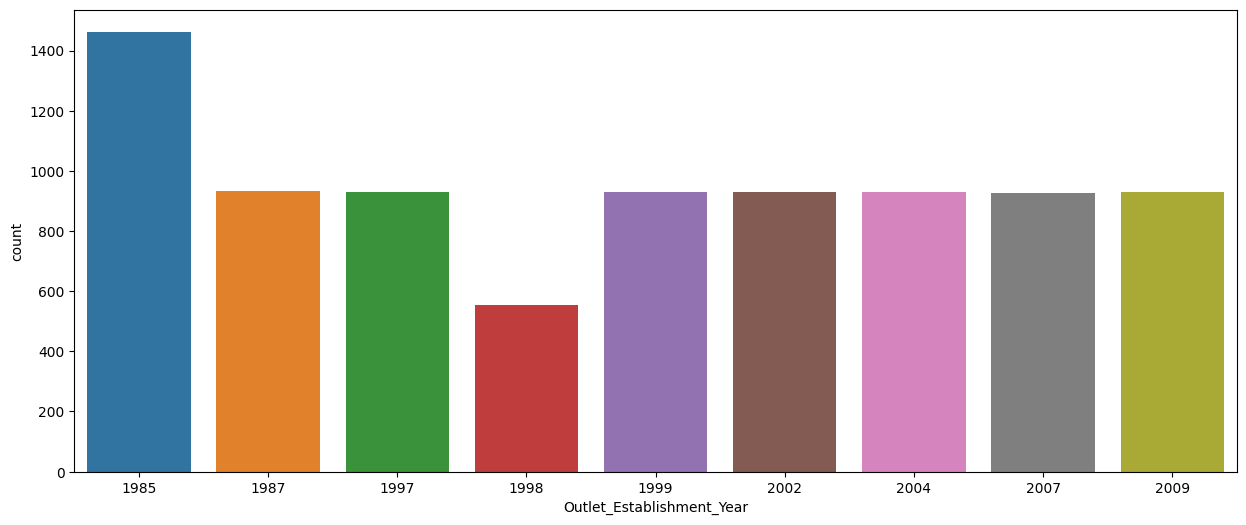

In [51]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()


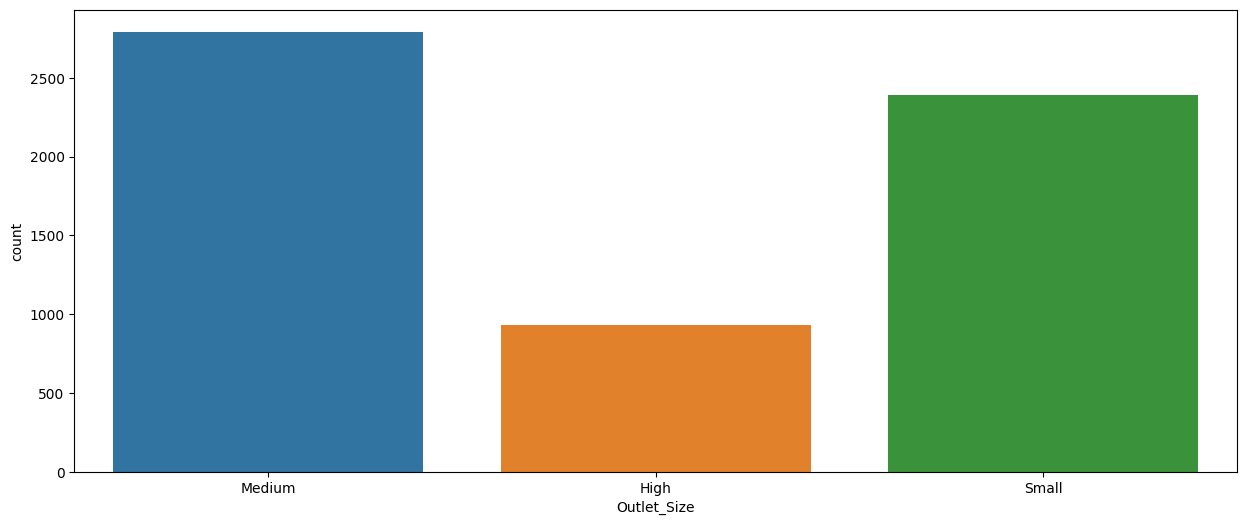

In [52]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()


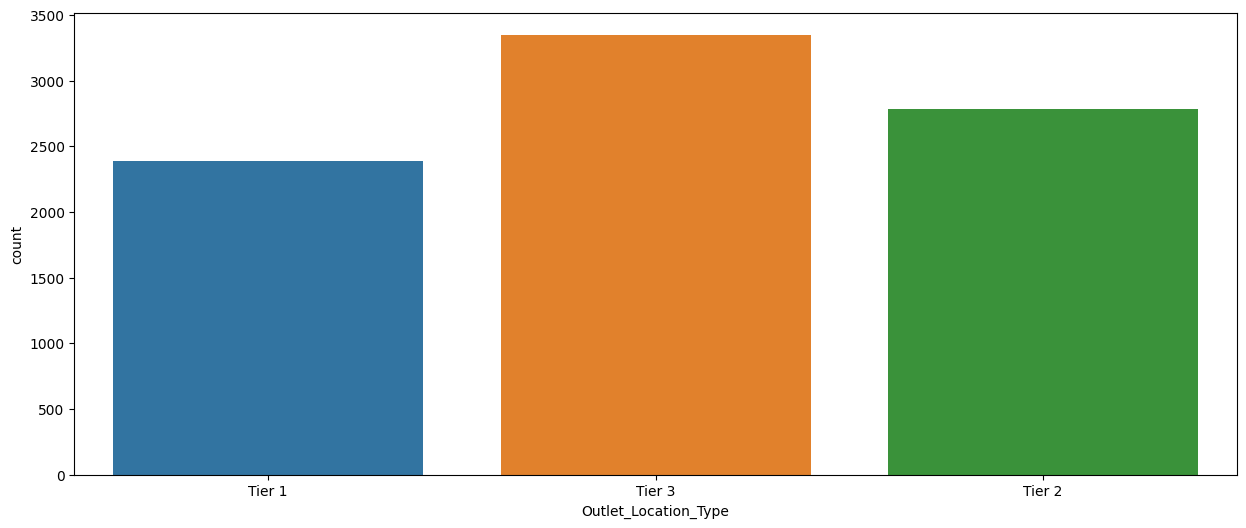

In [53]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()


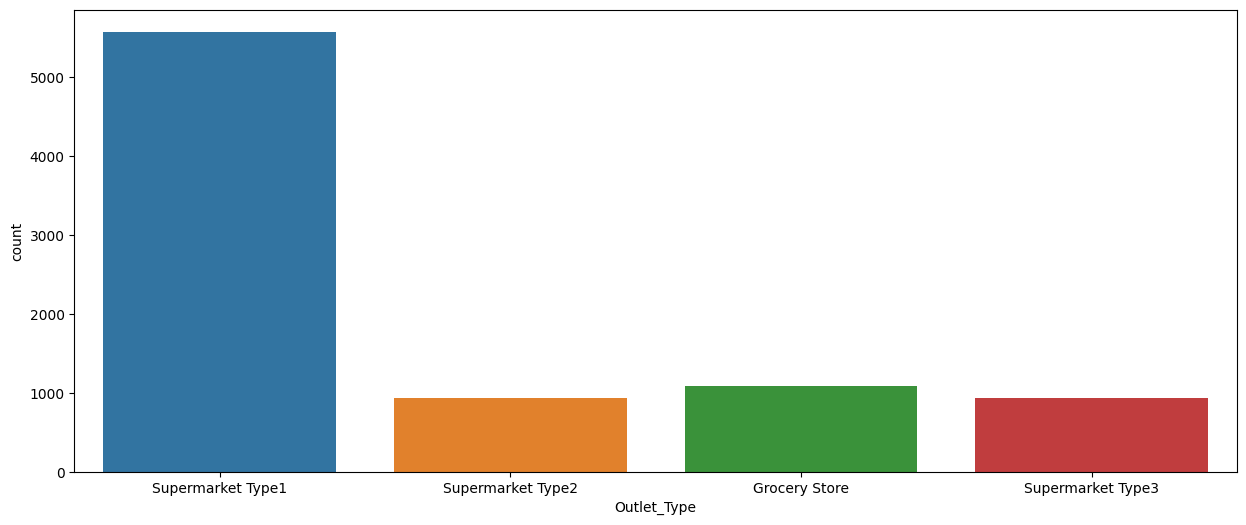

In [54]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()

Co-relation Matrix

In [55]:
corr = dt.corr()
display (corr)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.009169,0.025972,-0.013418,0.007675,0.013418
Item_Visibility,-0.009169,1.000000,-0.001315,-0.074834,-0.192996,0.074834
Item_MRP,0.025972,-0.001315,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.074834,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007675,-0.192996,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.074834,-0.005020,-1.000000,-0.077032,1.000000


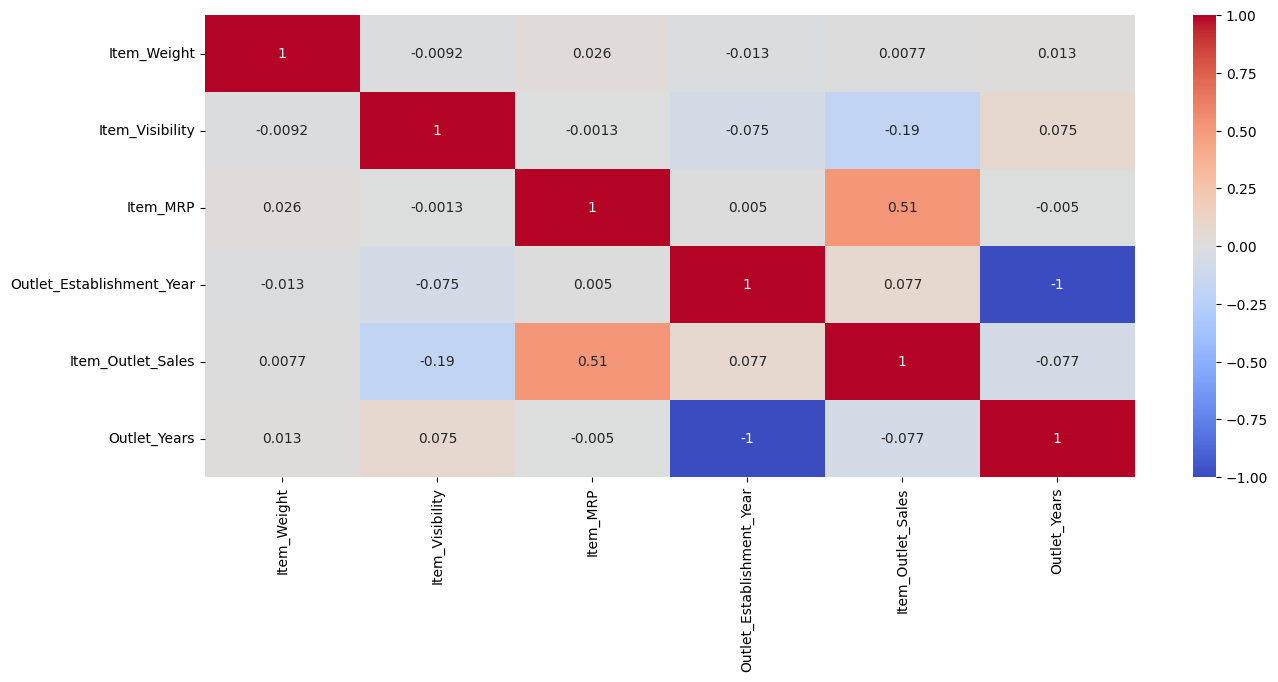

In [56]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [57]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.597664,Food,24
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,35


Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int64

In [59]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,23,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,13,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,23,9
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,3,2,0,6.597664,1,24,0
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,6.903451,2,35,1


In [60]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
display (dt.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,23,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,13,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,23,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,6.597664,24,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,6.903451,35,1,...,0,0,1,0,1,0,0,0,0,1


In [61]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
X.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,23,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,13,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,23,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,6,182.0950,24,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,9,53.8614,35,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [62]:
y = dt['Item_Outlet_Sales']
y.head()


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64


Train Test Split  


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(8523, 23) (8523,)
(5966, 23) (2557, 23) (5966,) (2557,)


In [64]:
from sklearn.metrics import SCORERS
SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
        # training the model
    model.fit(X, y)

    pred = model.predict(X)
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )
    cv_score = np.abs(np.mean(cv_score))
    print ('ABS Average of - neg_mean_squared_error',cv_score )
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )
    cv_score = np.mean(cv_score)
    print ('Average R2 Score ',cv_score)
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()





Model Report
Scoring - neg_mean_squared_error
[-0.29265947 -0.27374818 -0.28650647 -0.28448433 -0.28158365]
ABS Average of - neg_mean_squared_error 0.2837964201517705

R2 Score 
[0.69540752 0.73191058 0.71630608 0.73465627 0.72779807]
Average R2 Score  0.7212157041226481

Accuracy for full Data
R2_Score: 0.7232815003318094

Outlet_Type_0            -1.508455
Item_Visibility          -0.096210
Outlet_Size_0            -0.061136
Outlet_Size_3            -0.048091
New_Item_Type_0          -0.026534
Outlet_Location_Type_2   -0.018907
Outlet_Location_Type_0   -0.011606
Outlet                   -0.011092
Item_Fat_Content_0       -0.010404
Item_Weight              -0.001509
Outlet_Years             -0.000191
Item_Type                 0.000911
Item_Fat_Content_2        0.005163
Item_Fat_Content_1        0.005241
New_Item_Type_2           0.005241
Item_MRP                  0.008173
New_Item_Type_1           0.021294
Outlet_Size_2             0.024971
Outlet_Location_Type_1    0.030513
Outlet_Si

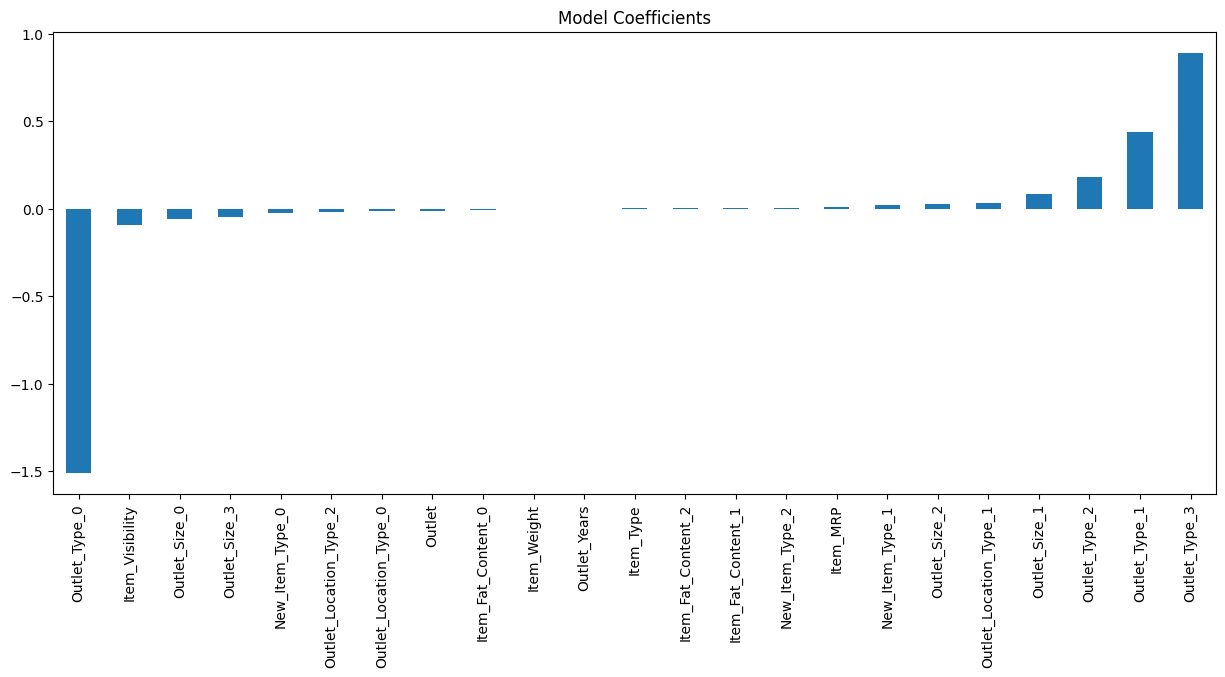

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.29261176 -0.27368522 -0.28651552 -0.2845462  -0.28161876]
ABS Average of - neg_mean_squared_error 0.28379549207618

R2 Score 
[0.69545717 0.73197224 0.71629712 0.73459856 0.72776414]
Average R2 Score  0.7212178452564053

Accuracy for full Data
R2_Score: 0.7232792428566301



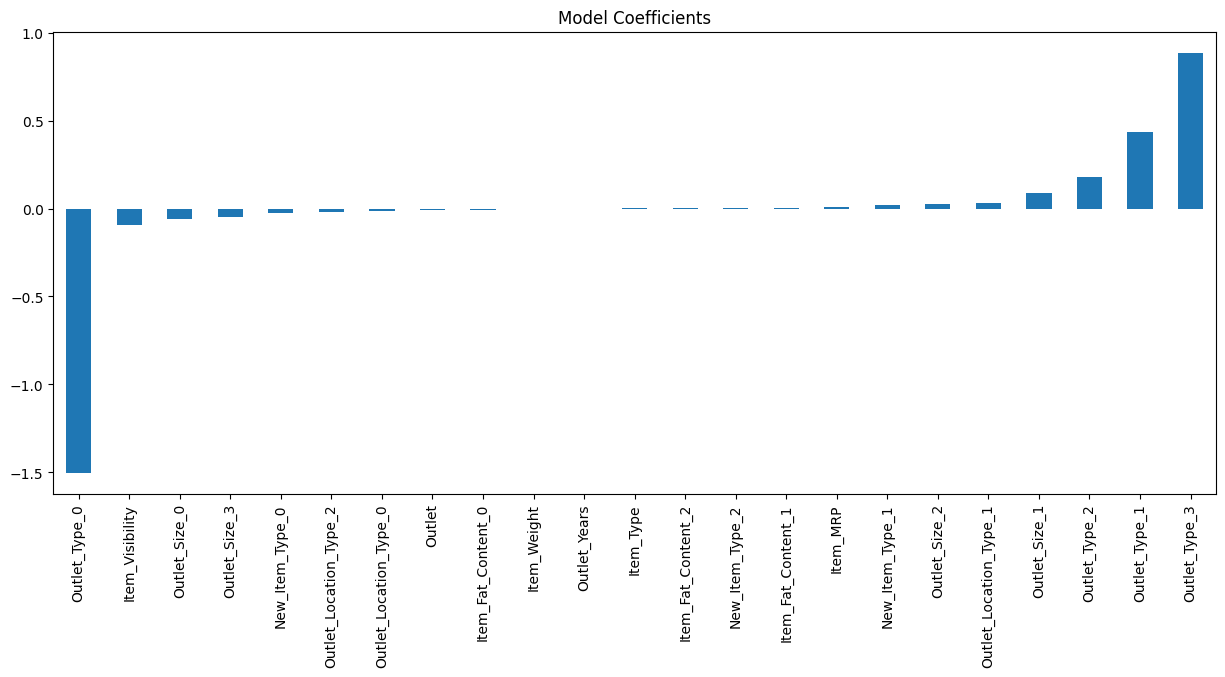

In [69]:
model = Ridge()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.72314998 -0.75701947 -0.75847666 -0.74093272 -0.78787083]
ABS Average of - neg_mean_squared_error 0.753489931597371

R2 Score 
[0.24736402 0.25862917 0.24896908 0.30891853 0.23837923]
Average R2 Score  0.2604520071591053

Accuracy for full Data
R2_Score: 0.26227683517122646



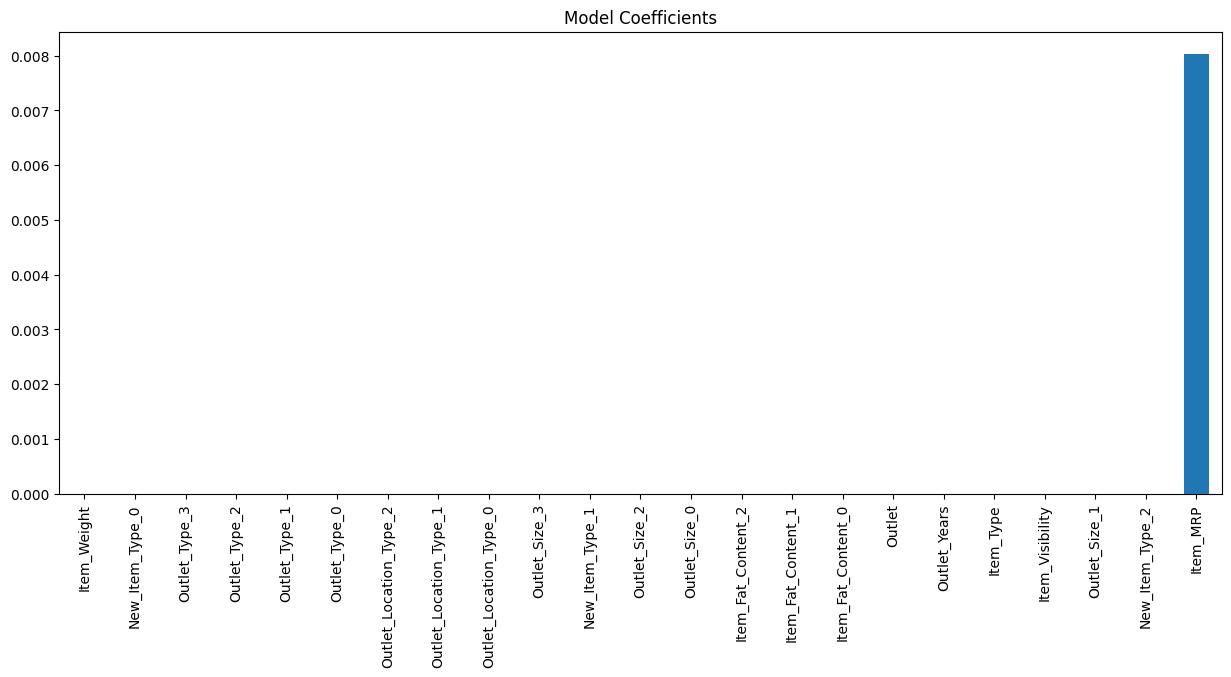

In [70]:
model = Lasso()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()



Model Report
Scoring - neg_mean_squared_error
[-0.57871224 -0.55306403 -0.54365671 -0.52309977 -0.51567387]
ABS Average of - neg_mean_squared_error 0.5428413243642018

R2 Score 
[0.37688953 0.47434394 0.46350187 0.49228111 0.4979223 ]
Average R2 Score  0.4609877499417873

Accuracy for full Data
R2_Score: 1.0



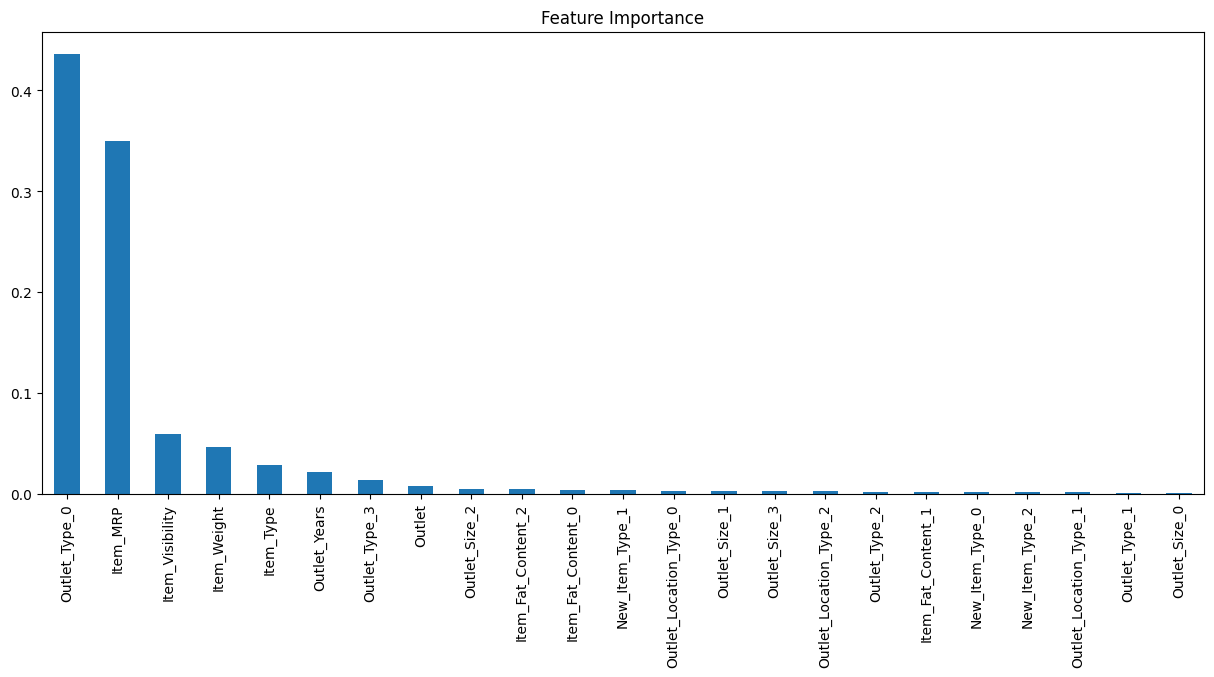

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()



Model Report
Scoring - neg_mean_squared_error
[-0.31137401 -0.28539197 -0.30555203 -0.28915289 -0.3024141 ]
ABS Average of - neg_mean_squared_error 0.2987770030884331

R2 Score 
[0.67710774 0.72271783 0.70085795 0.72794678 0.70456791]
Average R2 Score  0.7066396439994689

Accuracy for full Data
R2_Score: 0.9593445275110712



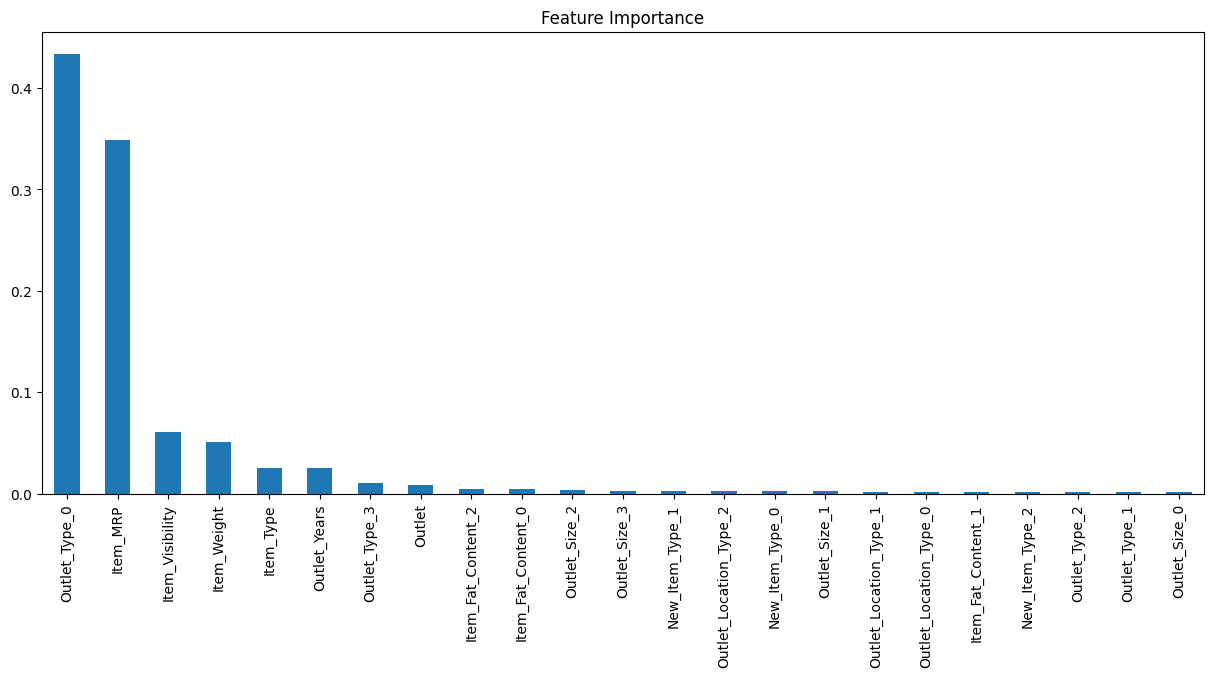

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.32308806 -0.30993717 -0.31731082 -0.31741165 -0.31376218]
ABS Average of - neg_mean_squared_error 0.31630197472592964

R2 Score 
[0.661592   0.69439775 0.68958668 0.70743816 0.69424481]
Average R2 Score  0.6894518805659301

Accuracy for full Data
R2_Score: 1.0



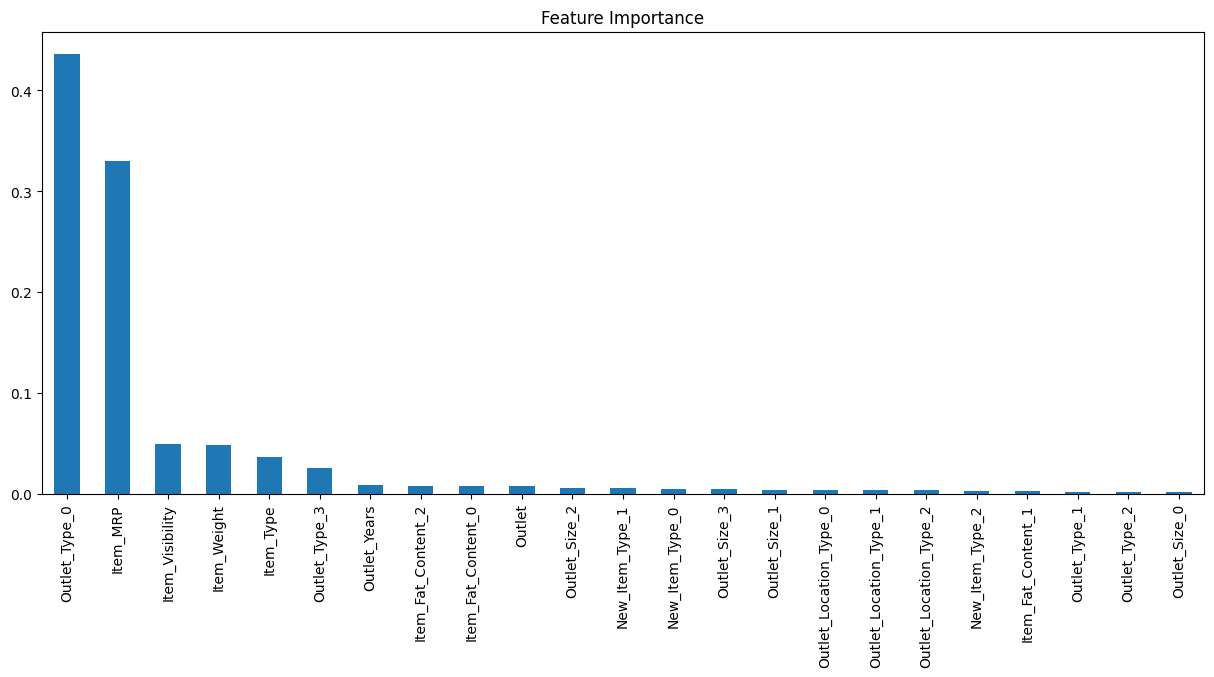

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 23
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 23
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

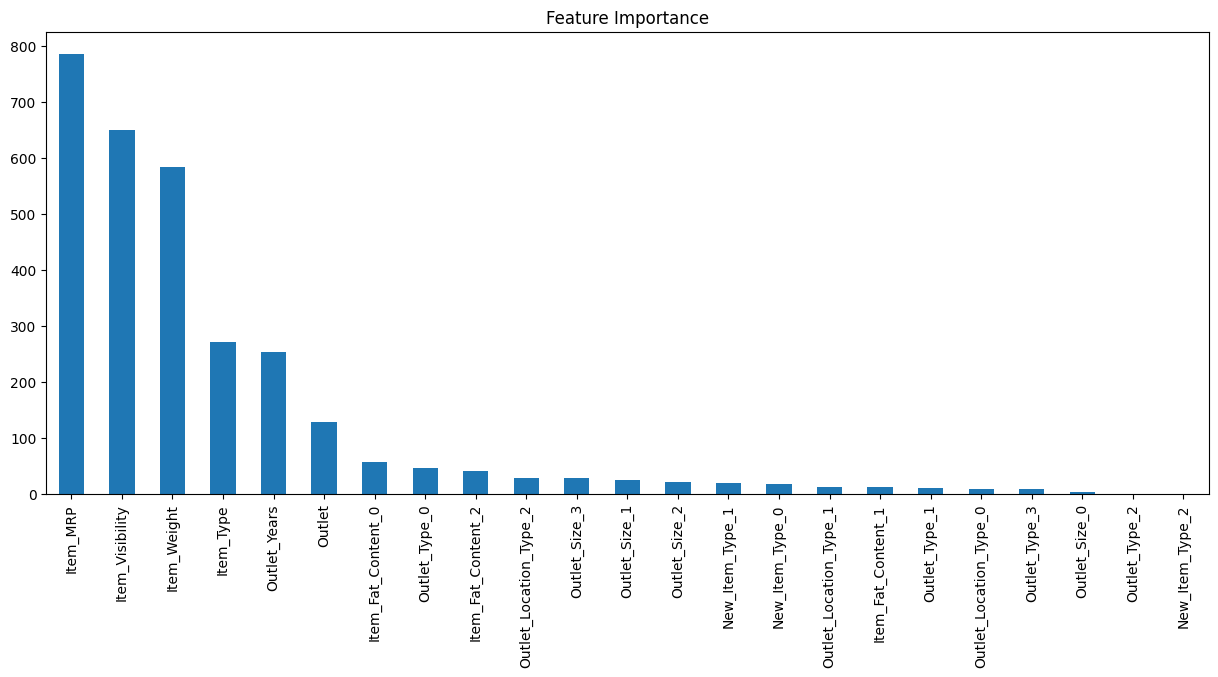

In [74]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.33603605 -0.3021327  -0.32345265 -0.31508156 -0.32745313]
ABS Average of - neg_mean_squared_error 0.32083121587928304

R2 Score 
[0.65026229 0.7041128  0.67972259 0.70611768 0.68345687]
Average R2 Score  0.6847344454181354

Accuracy for full Data
R2_Score: 0.9171757719631292



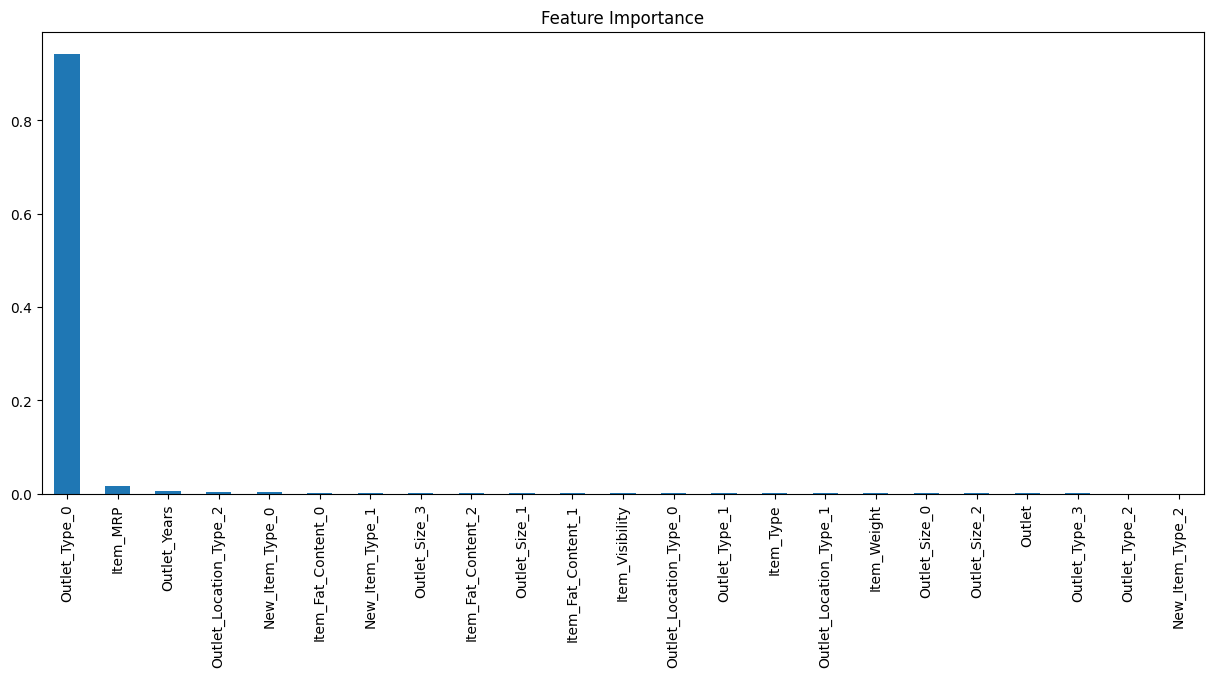

In [75]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()



In [76]:
from sklearn.model_selection import RandomizedSearchCV
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)



{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [77]:
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(X_train, y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   2.3s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)



{'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.2687419232147255


0.726425133089813

array([7.72324932, 7.54813015, 7.52642384, ..., 7.47687703, 7.69725526,
       7.86032043])

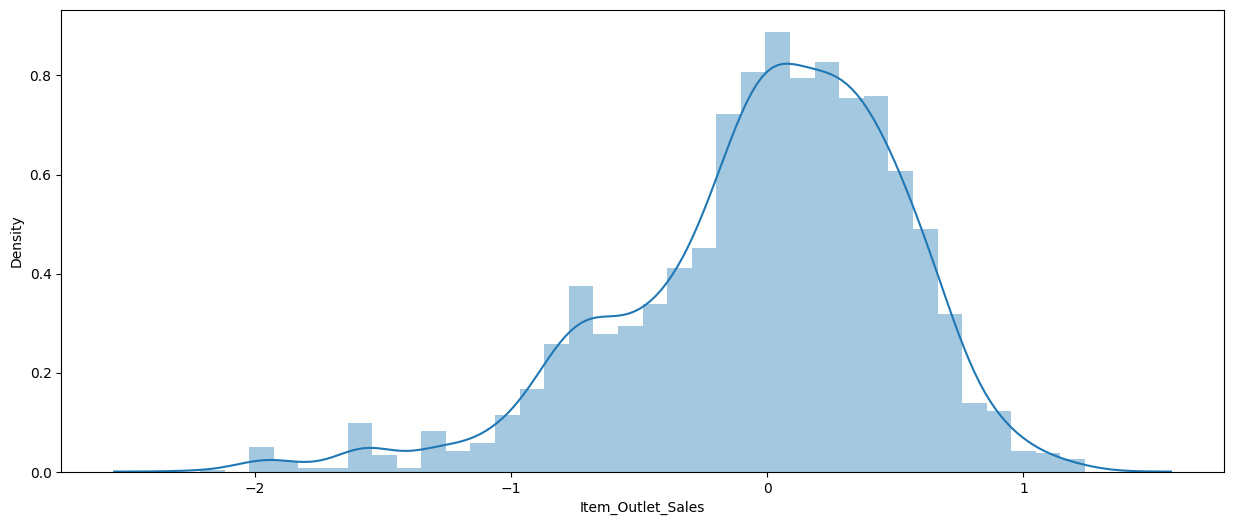

In [79]:
sns.distplot(y_test-predictions)
plt.show()


In [80]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [81]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 23
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d5e3d67dd20>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d5e3cd61c60>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5e3cd63be0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5e3cd633a0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d5e3cd63520>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.27037660887272186
[LightGBM] [Warning] Unknown parameter: gamma


0.7379659244771143

array([7.76703643, 7.43275695, 7.51101491, ..., 7.39800095, 7.75033611,
       7.85331485])

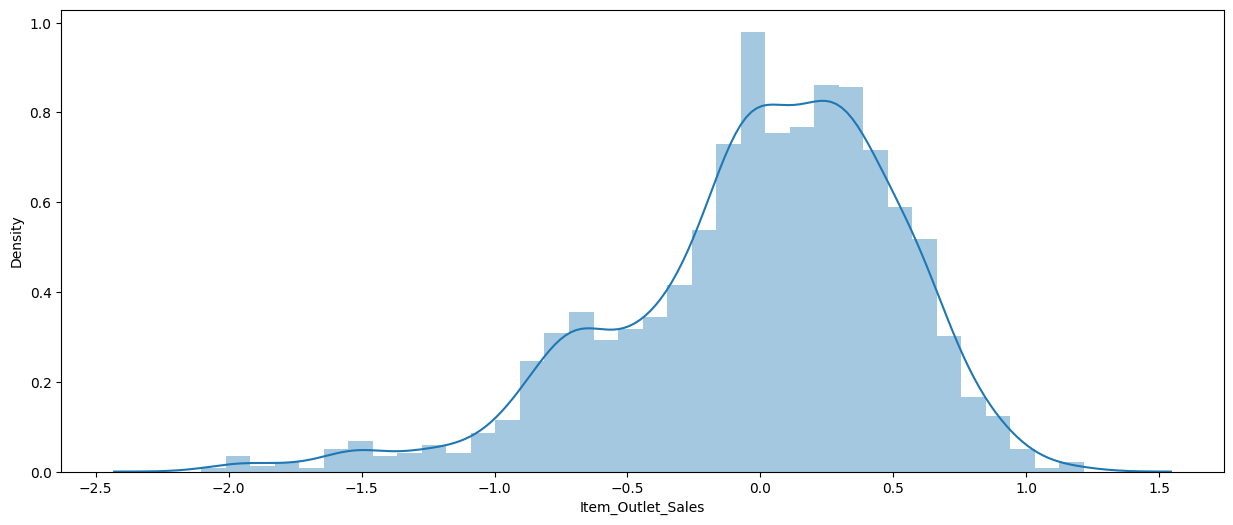

In [83]:
sns.distplot(y_test-predictions)
plt.show()


In [84]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1

    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [85]:
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5,verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   2.2s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.1s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d5e3cd40d60>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5e3cc5e650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5e3ccb4940>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d5e3cc5d180>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.26964795212370396


0.7392496409834308

array([7.750889 , 7.4278126, 7.5518894, ..., 7.354807 , 7.7547135,
       7.8510556], dtype=float32)

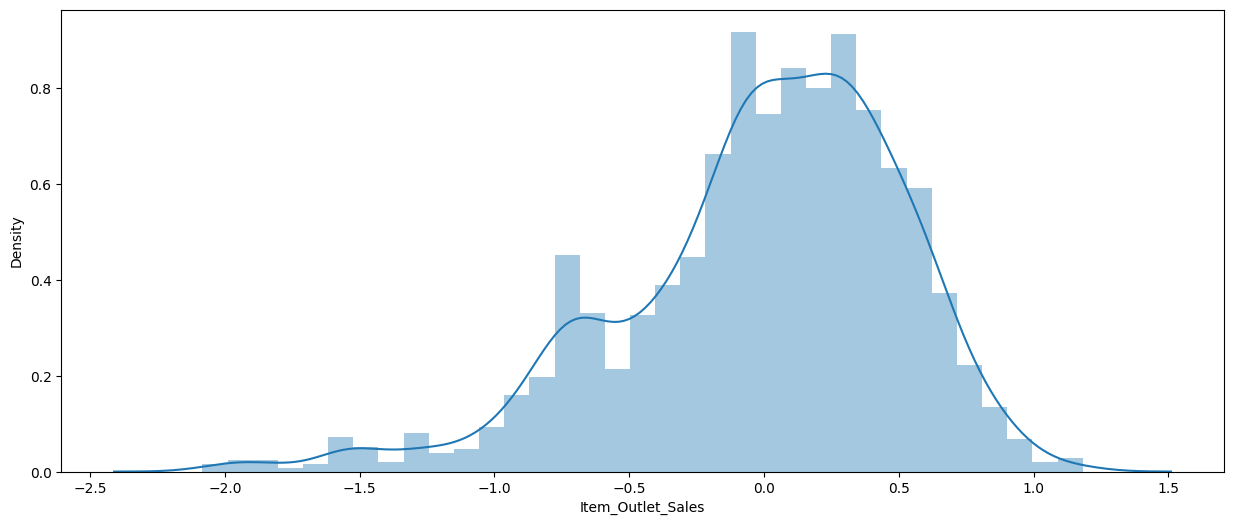

In [87]:
sns.distplot(y_test-predictions)
plt.show()
